In [45]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import cv2
import numpy as np
from skimage.color import rgb2gray

from skimage.morphology import (square, rectangle, diamond, disk)

In [46]:
def imagen(dir_imagen):
  img = mpimg.imread(dir_imagen,0)
  plt.figure()
  img = 255*rgb2gray(img)
  
  return img

In [63]:
def morphoper(I,o_m, e_e):
  rowsImg = I.shape[0]
  colsImg = I.shape[1]
  
  if(e_e == 'line'):
    w= rectangle(3,1,dtype=np.uint8)
  elif(e_e == 'square'):
    w= square(3,dtype=np.uint8)
  elif(e_e == 'diamond'):
    w= diamond(5,dtype=np.uint8)
  elif(e_e == 'disk'):
    w= disk(3,dtype=np.uint8)   
    
  if(o_m == 'erode'):
    rowsKernel=w[0]
    colsKernel=w[1]
    rowsPadding = int((rowsKernel-1)//2)
    colsPadding = int((colsKernel-1)//2)

    imgPadded = np.zeros((rowsImg+ 2*rowsPadding, colsImg + 2*colsPadding))
    imgPadded[rowsPadding: rowsImg +rowsPadding, colsPadding: colsImg+colsPadding]=I
    rowsImgOut = int(rowsImg - rowsKernel + 2* rowsPadding +1)
    colsImgOut = int(colsImg - colsKernel + 2* colsPadding +1)
    imgErode = np.zeros((rowsImgOut, colsImgOut),dtype=np.uint8)

    for i in range(rowsPadding,rowsImg-rowsPadding):
      for j in range(colsPadding,colsImg-colsPadding):
        imgPatch=imgErode[i-rowsPadding:i+rowsKernel-rowsPadding, j-colsPadding:j+colsKernel-colsPadding]
        imgErode[i,j]= np.min(imgPatch*w)
    return imgErode

  elif(o_m == 'dilate'):
      rowsKernel=w[0]
      colsKernel=w[1]
      rowsPadding = int((rowsKernel-1)//2)
      colsPadding = int((colsKernel-1)//2)

      imgDilate = np.zeros((rowsImg, colsImg),dtype=np.uint8)

      for i in range(rowsPadding,rowsImg-rowsPadding):
        for j in range(colsPadding,colsImg-colsPadding):
          imgPatch=imgDilate[i-rowsPadding:i+rowsKernel-rowsPadding, j-colsPadding:j+colsKernel-colsPadding]
          imgDilate[i,j]= np.max(imgPatch*w)
      return imgDilate

  elif(o_m == 'open'):
    rowsKernel=w[0]
    colsKernel=w[1]
    rowsPadding = int((rowsKernel-1)//2)
    colsPadding = int((colsKernel-1)//2)

    imgOpen = np.zeros((rowsImg, colsImg),dtype=np.uint8)

    for i in range(rowsPadding,rowsImg-rowsPadding):
      for j in range(colsPadding,colsImg-colsPadding):
        imgPatch=imgOpen[i-rowsPadding:i+rowsKernel-rowsPadding, j-colsPadding:j+colsKernel-colsPadding]
        imgOpen[i,j]= np.min(imgPatch*w)

    for i in range(rowsPadding,rowsImg-rowsPadding):
      for j in range(colsPadding,colsImg-colsPadding):
        imgPatch=imgOpen[i-rowsPadding:i+rowsKernel-rowsPadding, j-colsPadding:j+colsKernel-colsPadding]
        imgOpen[i,j]= np.max(imgPatch*w)
    return imgOpen

  elif(o_m == 'close'):
        rowsKernel=w[0]
        colsKernel=w[1]
        rowsPadding = int((rowsKernel-1)//2)
        colsPadding = int((colsKernel-1)//2)

        imgClose = np.zeros((rowsImg, colsImg),dtype=np.uint8)

        for i in range(rowsPadding,rowsImg-rowsPadding):
          for j in range(colsPadding,colsImg-colsPadding):
            imgPatch=imgClose[i-rowsPadding:i+rowsKernel-rowsPadding, j-colsPadding:j+colsKernel-colsPadding]
            imgClose[i,j]= np.max(imgPatch*w)

        for i in range(rowsPadding,rowsImg-rowsPadding):
          for j in range(colsPadding,colsImg-colsPadding):
            imgPatch=imgClose[i-rowsPadding:i+rowsKernel-rowsPadding, j-colsPadding:j+colsKernel-colsPadding]
            imgClose[i,j]= np.min(imgPatch*w)
        return imgClose 

  


(-0.5, 449.5, 449.5, -0.5)

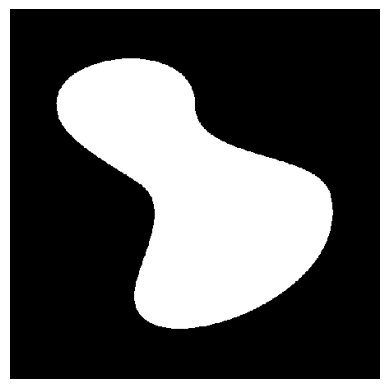

In [67]:
dir_img = r'/content/sample_data/pattern01.bmp' #Para correr de manera local, modificar esta linea; ya que esta direccion de la imagen es dada por Google Colab
I = cv2.imread(dir_img)
plt.imshow(I, cmap = 'gray') 
plt.axis('off')

TypeError: ignored

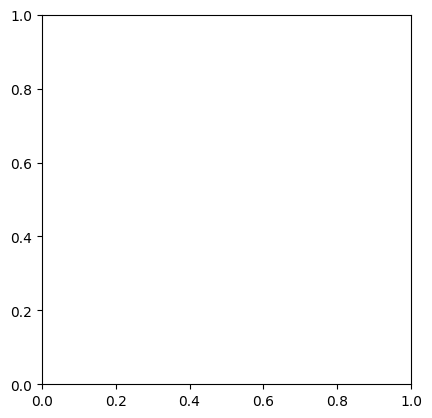

In [69]:
output=morphoper(I,'square','erode')
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
output=morphoper(I,'square','erode')
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
output=morphoper(I,'square','erode')
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()